In [2]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd

# Set root directory dynamically
ROOT_DIR = r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures'
sys.path.append(ROOT_DIR)
os.chdir(ROOT_DIR)
sys.path.append('M3_modeler')
sys.path.append('M2_data_extractor')
# Remove old module from cache
sys.modules.pop('data_extractor', None)
# Import modules and reload
try:
    os.chdir('M2_data_extractor')
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import data_extractor
    import feather_extractor
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    os.chdir('../utils')
    from help_functions import dict_to_horizontal_df, get_df_from_file
    from visualize import show_single_molecule
    import help_functions
    os.chdir('../M3_modeler')
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
    )
    import plot
    import modeling


    
    
    
except ModuleNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure the module is in the correct directory and the Python environment is set up properly.")

# Ensure Pandas displays all columns
pd.set_option('display.max_columns', None)

# Define paths
log_files_path = None  # Example: r'C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Blackwell_logs'
if log_files_path:
    logs_to_feather(log_files_path)

feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld\new_feather'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Secondary_Sphere\feather_benzal'
# feather_path=r'C:\Users\edens\Documents\GitHub\lucas_project\Doyle2021\logfiles\feather_files'
os.chdir(feather_path)

# Load molecular data
mols = data_extractor.Molecules(feather_path)

# Define dictionary of answers
answers_dict = {
    "Ring Vibration atoms": "9",
    "Strech Vibration atoms": "1,2 4,5",
    "Bending Vibration atoms": "22,23",
    "Dipole atoms": "11,6 4 10,11,12 11,12 5 4,5,1 4,3,2",
    "NPA manipulation atoms": "11,6 4 10,11,12 11,12,5 4,5,1 4,3,2",
    "Sub-Atoms": "1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25",
    "Charge values": "1,3,5,11,8,12,14",
    "Charge difference": "11,5 3,5 11,12 12,5",
    "Sterimol atoms": "4,6 6,4 4,3 11,6",
    "Bond length": "11,12 6,4 12,13 12,5 12,14 4,3",
    "Bond Angle": "11,6 4,6 4,5 1,5,4,3 11,6,4,5"
}

list_answers = [
    [9,8], [1600], [], [3000], [22, 23],
    [[11, 6, 4], [10, 11, 12], [11, 12, 5], [4, 5, 1], [4, 3, 2]],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
    [[5,1,25], [10, 11, 12], [11, 12, 5]],
    [1, 3, 5, 11, 8, 12, 14,4,6],
    [[11, 5], [3, 5], [11, 12], [12, 5], [4, 11], [4, 3],[6,12],[4,6]],
    [[4, 6], [6, 4], [4, 3], [11, 6]],
    [[11, 12],[3,11],[3,12],[5,11], [12, 14],[4,12]],
    [[11, 6, 4], [6, 4, 5], [1, 5, 4, 3], [11, 6, 4, 5]]

]


Molecules Loaded: ['LS1621.feather', 'LS1622.feather', 'LS1630.feather', 'LS1641.feather', 'LS1642.feather', 'LS1643.feather', 'LS1661.feather', 'LS1663.feather', 'LS1685.feather', 'LS1687.feather', 'LS1688.feather', 'LS1689.feather', 'LS1690.feather', 'LS1695.feather', 'LS1696.feather', 'LS1714.feather', 'LS1715.feather', 'LS1716.feather', 'LS1717.feather', 'LS1721.feather', 'LS1723.feather', 'LS1726.feather', 'LS1734.feather', 'LS1736.feather', 'LS2000.feather', 'LS2001.feather', 'LS2002.feather', 'LS2003.feather', 'LS2004.feather', 'LS2005.feather', 'LS2006.feather', 'LS2007.feather', 'LS2008.feather'] Failed Molecules: []


In [3]:
feather_path = r'C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld\conformer_feather'

os.chdir(feather_path)

# Load molecular data

confs = data_extractor.Molecules(feather_path)

Molecules Loaded: ['LS1621_crest_best.feather', 'LS1685_crest_best.feather', 'LS1688_crest_best.feather', 'LS1689_crest_best.feather', 'LS1690_crest_best.feather', 'LS1714_crest_best.feather', 'LS1715_crest_best.feather', 'LS1716_crest_best.feather', 'LS1717_crest_best.feather', 'LS1721_crest_best.feather', 'LS1723_crest_best.feather', 'LS1726_crest_best.feather', 'LS1736_crest_best.feather', 'LS2000_crest_best.feather', 'LS2006_crest_best.feather'] Failed Molecules: []


In [21]:
mols.visualize_molecules([10])

{frozenset({0, 1}): 1.54, frozenset({1, 2}): 1.48, frozenset({2, 3}): 1.38, frozenset({3, 4}): 1.28, frozenset({5, 6}): 1.38, frozenset({6, 7}): 1.4, frozenset({8, 7}): 1.39, frozenset({8, 9}): 1.39, frozenset({9, 10}): 1.32, frozenset({10, 11}): 2.17, frozenset({11, 12}): 2.33, frozenset({13, 14}): 1.09, frozenset({34, 35}): 1.4, frozenset({35, 36}): 1.38, frozenset({36, 37}): 1.4, frozenset({3, 5}): 1.49, frozenset({11, 13}): 1.98, frozenset({13, 15}): 1.09, frozenset({24, 26}): 1.53, frozenset({27, 29}): 1.09, frozenset({16, 13}): 1.09, frozenset({24, 27}): 1.53, frozenset({0, 4}): 1.47, frozenset({24, 28}): 1.53, frozenset({26, 30}): 1.09, frozenset({10, 5}): 1.35, frozenset({34, 39}): 1.39, frozenset({43, 38}): 1.09, frozenset({42, 36}): 1.08, frozenset({44, 38}): 1.09, frozenset({11, 4}): 2.25, frozenset({45, 38}): 1.09, frozenset({53, 46}): 1.08, frozenset({47, 39}): 1.08, frozenset({25, 35}): 1.08, frozenset({17, 6}): 1.08, frozenset({18, 7}): 1.34, frozenset({8, 19}): 1.08, fr

In [23]:
confs.visualize_molecules([2])

{frozenset({0, 1}): 1.55, frozenset({1, 2}): 1.47, frozenset({2, 3}): 1.38, frozenset({3, 4}): 1.28, frozenset({5, 6}): 1.39, frozenset({6, 7}): 1.4, frozenset({8, 7}): 1.4, frozenset({8, 9}): 1.39, frozenset({9, 10}): 1.33, frozenset({10, 11}): 2.18, frozenset({11, 12}): 2.34, frozenset({13, 14}): 1.1, frozenset({34, 35}): 1.4, frozenset({35, 36}): 1.39, frozenset({36, 37}): 1.4, frozenset({3, 5}): 1.49, frozenset({11, 13}): 1.98, frozenset({13, 15}): 1.1, frozenset({24, 26}): 1.53, frozenset({27, 29}): 1.1, frozenset({16, 13}): 1.1, frozenset({24, 27}): 1.53, frozenset({0, 4}): 1.46, frozenset({24, 28}): 1.53, frozenset({26, 30}): 1.1, frozenset({10, 5}): 1.35, frozenset({34, 39}): 1.39, frozenset({43, 38}): 1.1, frozenset({42, 36}): 1.09, frozenset({44, 38}): 1.1, frozenset({11, 4}): 2.24, frozenset({45, 38}): 1.1, frozenset({53, 46}): 1.09, frozenset({47, 39}): 1.09, frozenset({25, 35}): 1.09, frozenset({17, 6}): 1.09, frozenset({18, 7}): 1.33, frozenset({8, 19}): 1.09, frozenset({

In [26]:
import numpy as np

def kabsch_align(P, Q):
    """
    Align P onto Q using the Kabsch algorithm (no scaling).
    P, Q: (N,3) coordinate arrays.
    Returns P_rot: P after optimal rotation+translation to Q.
    """
    # 1. Subtract centroids
    centroid_P = P.mean(axis=0)
    centroid_Q = Q.mean(axis=0)
    P_centered = P - centroid_P
    Q_centered = Q - centroid_Q

    # 2. Covariance matrix
    H = P_centered.T @ Q_centered

    # 3. SVD
    U, S, Vt = np.linalg.svd(H)
    # 4. Ensure right-handed coordinate system
    d = np.sign(np.linalg.det(Vt.T @ U.T))
    D = np.diag([1.0, 1.0, d])

    # 5. Optimal rotation
    R = Vt.T @ D @ U.T

    # 6. Rotate P and re-apply Q’s centroid
    P_rot = (P_centered @ R) + centroid_Q
    return P_rot

def compute_pairwise_rmsds_aligned(mols, confs):
    """
    For each name in mols.molecule_names, find the matching
    crest conformer in confs, align the two xyz_df’s, and
    compute RMSD after superposition.
    Returns a dict: {base_name: rmsd}.
    """
    rmsd_dict = {}
    for name in mols.molecules_names:
        crest_name = f"{name}_crest_best"
        if crest_name not in confs.molecules_names:
            print(f"⚠️ No matching conformer for {name!r}")
            continue

        i = mols.molecules_names.index(name)
        j = confs.molecules_names.index(crest_name)

        df1 = mols.molecules[i].xyz_df
        df2 = confs.molecules[j].xyz_df

        if df1.shape[0] != df2.shape[0]:
            print(f"Atom count mismatch for {name}: "
                             f"{df1.shape[0]} vs {df2.shape[0]}")
            continue

        coords1 = df1[['x','y','z']].to_numpy()
        coords2 = df2[['x','y','z']].to_numpy()

        # align coords1 onto coords2
        coords1_aligned = kabsch_align(coords1, coords2)

        # compute RMSD
        diff2 = np.sum((coords1_aligned - coords2)**2, axis=1)
        rmsd = np.sqrt(np.mean(diff2))

        rmsd_dict[name] = rmsd

    return rmsd_dict

# Example usage:
# rmsds = compute_pairwise_rmsds_aligned(mols, confs)
# for nm, val in rmsds.items():
#     print(f"{nm}: RMSD = {val:.3f} Å")
rmsds = compute_pairwise_rmsds_aligned(mols, confs)
print(rmsds)

⚠️ No matching conformer for 'LS1622'
⚠️ No matching conformer for 'LS1630'
⚠️ No matching conformer for 'LS1641'
⚠️ No matching conformer for 'LS1642'
⚠️ No matching conformer for 'LS1643'
⚠️ No matching conformer for 'LS1661'
⚠️ No matching conformer for 'LS1663'
Atom count mismatch for LS1685: 55 vs 57
⚠️ No matching conformer for 'LS1687'
⚠️ No matching conformer for 'LS1695'
⚠️ No matching conformer for 'LS1696'
⚠️ No matching conformer for 'LS1734'
⚠️ No matching conformer for 'LS2001'
⚠️ No matching conformer for 'LS2002'
⚠️ No matching conformer for 'LS2003'
⚠️ No matching conformer for 'LS2004'
⚠️ No matching conformer for 'LS2005'
⚠️ No matching conformer for 'LS2007'
⚠️ No matching conformer for 'LS2008'
{'LS1621': 0.15348047778823168, 'LS1688': 0.734592402909031, 'LS1689': 0.8302371332086518, 'LS1690': 0.6276984393716721, 'LS1714': 0.5602671236554925, 'LS1715': 4.987112170141543, 'LS1716': 1.6743785559799889, 'LS1717': 0.5135064716942808, 'LS1721': 0.9861626130170378, 'LS17

In [2]:
df=mols.get_molecules_comp_set_app(answers_dict=None,answers_list_load=list_answers)
df

None
Calculating Bend vibration for atoms [22, 23] with threshold 3000 
 Remember : ALWAYS LOOK AT THE RESULTING VIBRATION


,cross,cross_angle,para,para_angle,Frequency_Bending_22-23,Cross_mag_Bending_22-23,dip_x_NPA_11-6-4,dip_y_NPA_11-6-4,dip_z_NPA_11-6-4,total_dipole_NPA_11-6-4,dip_x_NPA_10-11-12,dip_y_NPA_10-11-12,dip_z_NPA_10-11-12,total_dipole_NPA_10-11-12,dip_x_NPA_11-12-5,dip_y_NPA_11-12-5,dip_z_NPA_11-12-5,total_dipole_NPA_11-12-5,dip_x_NPA_4-5-1,dip_y_NPA_4-5-1,dip_z_NPA_4-5-1,total_dipole_NPA_4-5-1,dip_x_NPA_4-3-2,dip_y_NPA_4-3-2,dip_z_NPA_4-3-2,total_dipole_NPA_4-3-2,dipole_x_5-1-25,dipole_y_5-1-25,dipole_z_5-1-25,total_dipole_5-1-25,dipole_x_10-11-12,dipole_y_10-11-12,dipole_z_10-11-12,total_dipole_10-11-12,dipole_x_11-12-5,dipole_y_11-12-5,dipole_z_11-12-5,total_dipole_11-12-5,nbo_atom_1,nbo_atom_3,nbo_atom_5,nbo_atom_11,nbo_atom_8,nbo_atom_12,nbo_atom_14,hirshfeld_atom_1,hirshfeld_atom_3,hirshfeld_atom_5,hirshfeld_atom_11,hirshfeld_atom_8,hirshfeld_atom_12,hirshfeld_atom_14,cm5_atom_1,cm5_atom_3,cm5_atom_5,cm5_atom_11,cm5_atom_8,cm5_atom_12,cm5_atom_14,nbo_diff_11-5,nbo_diff_3-5,nbo_diff_11-12,nbo_diff_12-5,hirshfeld_diff_11-5,hirshfeld_diff_3-5,hirshfeld_diff_11-12,hirshfeld_diff_12-5,cm5_diff_11-5,cm5_diff_3-5,cm5_diff_11-12,cm5_diff_12-5,B1_4-6,B5_4-6,L_4-6,loc_B5_4-6,B1_B5_angle_4-6,B1_6-4,B5_6-4,L_6-4,loc_B5_6-4,B1_B5_angle_6-4,B1_4-3,B5_4-3,L_4-3,loc_B5_4-3,B1_B5_angle_4-3,B1_11-6,B5_11-6,L_11-6,loc_B5_11-6,B1_B5_angle_11-6,bond_length_11-12,bond_length_3-11,bond_length_3-12,bond_length_5-11,bond_length_12-14,bond_length_4-12,"angle_[11, 6, 4]","angle_[6, 4, 5]","dihedral_[1, 5, 4, 3]","dihedral_[11, 6, 4, 5]"
LS1621,1674.6111,39.227103,1652.6065,53.790361,3176.5085,0.341497,1.160731,4.299914,-0.409019,4.472567,-3.054492,3.064794,-0.171324,4.330385,4.325054,-0.650147,-0.077242,4.374328,4.430421,-1.231978,0.382390,4.614393,0.915549,4.461030,-0.808884,4.625290,-1.863747,-1.024725,-10.519571,10.7325,-10.180303,-3.377346,-0.374115,10.7325,3.360200,-10.191187,0.183729,10.7325,-0.08843,-0.47523,-0.44749,-0.37993,-0.15272,0.38106,-0.70421,0.025547,-0.131285,-0.108202,-0.053677,-0.004202,0.164793,-0.144169,0.022678,-0.207793,-0.353321,-0.314159,-0.057741,0.397356,-0.340934,0.06756,-0.02774,-0.76099,0.82855,0.054525,-0.023083,-0.218470,0.272995,0.039162,0.145528,-0.711515,0.750677,1.6998,3.2852,6.2555,3.7923,91.0482,1.9316,4.8590,7.1930,4.5669,119.2581,1.6991,6.1440,3.5204,1.3677,144.7530,1.9574,7.3621,5.4352,3.2715,119.8702,2.178381,3.594038,4.262064,2.745039,1.973706,2.963223,115.225880,123.183505,3.866926,4.982389
LS1622,1688.8190,7.836688,1660.1501,84.348787,3179.1136,0.337101,0.272959,1.839751,-0.989847,2.106891,-3.199226,1.077458,-0.910373,3.496389,2.476554,-1.778912,0.796034,3.151431,0.554543,-0.580570,1.047279,1.319611,-0.380821,0.612844,-0.994820,1.228930,-1.792450,1.775714,-9.693686,10.0166,-9.997078,-0.459818,-0.424948,10.0166,5.574201,-8.321639,0.110408,10.0166,-0.08915,-0.47427,-0.44016,-0.37463,-0.12868,0.37809,-0.70028,0.026314,-0.130423,-0.105224,-0.048963,0.000883,0.165090,-0.141094,0.023349,-0.206961,-0.349665,-0.308815,-0.048492,0.396865,-0.337926,0.06553,-0.03411,-0.75272,0.81825,0.056261,-0.025199,-0.214053,0.270314,0.040850,0.142704,-0.705680,0.746530,2.0629,3.2858,7.6548,3.7996,109.0228,1.9312,4.8565,7.1931,4.5734,119.1972,1.6991,6.1445,3.5161,1.3591,144.8043,2.3398,7.3589,5.4389,3.2800,111.8759,2.181839,3.594216,4.268282,2.745470,1.973025,2.969747,115.242874,123.122975,3.817904,5.056583
LS1630,1643.0843,30.852374,1678.5785,60.148641,3176.0039,0.333806,2.667708,4.898217,-0.305293,5.585910,-2.316098,4.650567,-0.077794,5.195972,5.269708,0.872177,-0.204786,5.345321,6.159097,-0.302250,0.142644,6.168158,2.549087,5.582991,-0.915997,6.205375,-2.423660,-0.080908,-11.988257,12.2311,-11.868040,-2.951194,-0.197577,12.2311,4.792779,-11.252821,-0.047437,12.2311,-0.08857,-0.47873,-0.44479,-0.40645,0.35094,0.38062,-0.70331,0.025554,-0.132824,-0.107156,-0.068794,0.101392,0.163014,-0.144128,0.022714,-0.209683,-0.351706,-0.328876,0.121196,0.394774,-0.340945,0.03834,-0.03394,-0.78707,0.82541,0.038362,-0.025668,-0.231808,0.270170,0.0

In [10]:
import os
os.chdir(r'C:\Users\edens\Documents\GitHub\lucas_project\new_update_logs')
combined_df.to_csv('added_features.csv', index=True)

            cross  cross_angle       para  para_angle  \
names                                                   
LS1621  1674.6111    39.227103  1652.6065   53.790361   
LS1622  1688.8190     7.836688  1660.1501   84.348787   
LS1630  1643.0843    30.852374  1678.5785   60.148641   
LS1641  1647.4172    29.770644  1680.0379   59.709925   
LS1642  1642.4555     4.440006  1667.7782   76.476774   

        Frequency_Bending_22-23  Cross_mag_Bending_22-23  dip_x_NPA_11-6-4  \
names                                                                        
LS1621                3176.5085                 0.341497          1.160731   
LS1622                3179.1136                 0.337101          0.272959   
LS1630                3176.0039                 0.333806          2.667708   
LS1641                3173.2922                 0.364401          2.046429   
LS1642                3171.0399                 0.375880          1.766727   

        dip_y_NPA_11-6-4  dip_z_NPA_11-6-4  total_dip

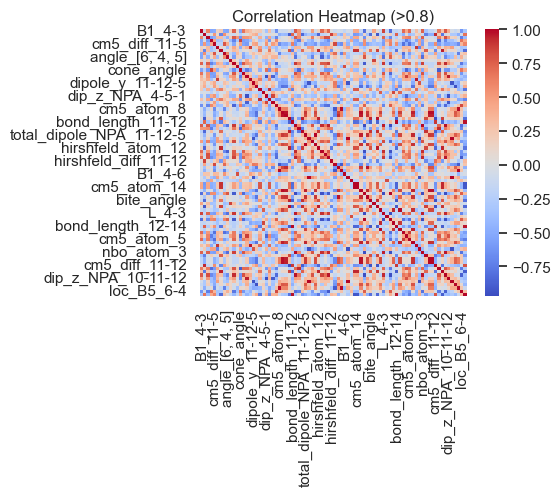


Correlated features were not dropped.

Left out samples:   ['LS1621', 'LS1630', 'LS1663', 'LS2007']
Remaining samples:  ['LS1622', 'LS1641', 'LS1642', 'LS1643', 'LS1661', 'LS1685', 'LS1687', 'LS1688', 'LS1689', 'LS1690', 'LS1695', 'LS1696', 'LS1714', 'LS1715', 'LS1716', 'LS1717', 'LS1721', 'LS1723', 'LS1726', 'LS1734', 'LS1736', 'LS2000', 'LS2001', 'LS2002', 'LS2003', 'LS2004', 'LS2005', 'LS2006', 'LS2008']
Using 1 jobs for evaluation. Found 20 cores.
Combos to run: 106507051, done_combos: 0
Evaluating 106507051 new combos with R2 >= 0.85...


Threshold 0.85 (single-core):   0%|          | 225688/106507051 [43:21<256:47:54, 114.96it/s]  

: 

In [ ]:
csv_path=r'C:\Users\edens\Documents\GitHub\Robert\added_features.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ['LS2008','LS1643']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
df=pd.read_csv(csv_path, index_col=0)

# df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
leave_out = [
    "LS1621", "LS1622", "LS1630", "LS1641", "LS1642", "LS1643",
    "LS1661", "LS1663", "LS1714", "LS1715", "LS1716", "LS1717",
    "LS1721", "LS1723", "LS1726", "LS1734", "LS1736",
    "LS2000", "LS2001", "LS2002", "LS2003", "LS2006", "LS2007", "LS2008"
]

# pick 4 random samples to leave out
leave_out = np.random.choice(df.index, size=4, replace=False).tolist()
Regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=leave_out, min_features_num=2, max_features_num=None, metrics=None, return_coefficients=False)
# Regression_model.leave_out_samples(leave_out=leave_out, keep_only=True)
features_combination_1=['L_25-1', 'B5_19-18', 'L_19-18', 'loc_B5_1-5', 'HOMO-LUMO Gap (eV)']
features_combination_2=[ 'hirshfeld_atom_12','cm5_atom_5', 'bond_length_12-14','HOMO-LUMO Gap (eV)','bite_angle_inverted']
features_combination_3=[ 'hirshfeld_atom_12','cm5_atom_5', 'L_11-6','HOMO-LUMO Gap (eV)']
features=['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14']


# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
# x=Regression_model.check_linear_regression_assumptions()
# Regression_model.fit_and_evaluate_combinations()
plot.generate_and_display_q2_scatter_plot(Regression_model,features_combination_1)


In [ ]:
os.chdir(r'C:\Users\edens\Documents\GitHub\Robert')
x=Regression_model.fit_and_evaluate_combinations(initial_r2_threshold=0.7)


: 

Database already exists at: results_added_features_classification.db
Table 'classification_results' has been ensured to exist.

--- Correlation Report ---
Features with correlation above 0.8:
['total_dipole_5-1-25', 'Frequency_Stretch_5_4', 'loc_B5_19-18', 'L_11-6', 'B1_20-9', 'Amplitude_Stretch_5_4', 'cm5_atom_12', 'bond_length_12-14', 'dipole_x_10-11-12', 'B1_11-6', 'hirshfeld_atom_12', 'B1_19-18', 'bite_angle', 'para_angle', 'total_dipole_10-11-12', 'cross_angle', 'loc_B5_1-5', 'bite_angle_inverted', 'Cross_mag_Bending_22-23']



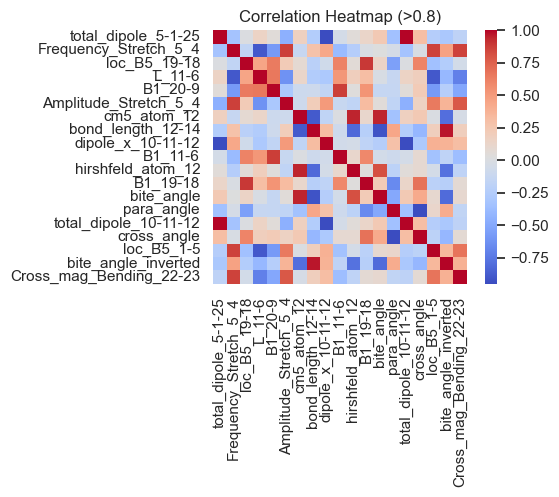


Correlated features were not dropped.



In [16]:
csv_path=r'C:\Users\edens\Documents\GitHub\Robert\added_features_classification.csv'


csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
# ['LS2008','LS1643']
# ('B1_B5_angle_4-3', 'L_11-6', 'bond_length_11-12')
leave_out = [
    "LS1621", "LS1622", "LS1630", "LS1641", "LS1642", "LS1643",
    "LS1661", "LS1663", "LS1714", "LS1715", "LS1716", "LS1717",
    "LS1721", "LS1723", "LS1726", "LS1734", "LS1736",
    "LS2000", "LS2001", "LS2002", "LS2003", "LS2006", "LS2007", "LS2008"
]

Regression_model = ClassificationModel(csv_filepaths, process_method='one csv', output_name='output', leave_out=None, min_features_num=4, max_features_num=4, metrics=None, return_coefficients=False)


[{'combination': ['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14'], 'scores': {'accuracy': 0.9090909090909091, 'precision': 0.9300699300699301, 'recall': 0.9090909090909091, 'f1_score': 0.9106707168301371, 'mc_fadden_r2': 0.1948927801761143, 'avg_accuracy': 0.738095238095238, 'avg_f1_score': 0.7526984126984128}, 'models': <modeling.ClassificationModel object at 0x00000238D2CAA3A0>}]
| formula                                                               |   accuracy |   precision |   recall |       f1 |   mcfaden |   avg_accuracy |   avg_f1 |   Model_id |
|:----------------------------------------------------------------------|-----------:|------------:|---------:|---------:|----------:|---------------:|---------:|-----------:|
| ['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14'] |   0.909091 |     0.93007 | 0.909091 | 0.910671 |  0.194893 |       0.738095 | 0.752698 |          0 |
Checking correlation matrix:
                    B1_B5_angle_25-1 

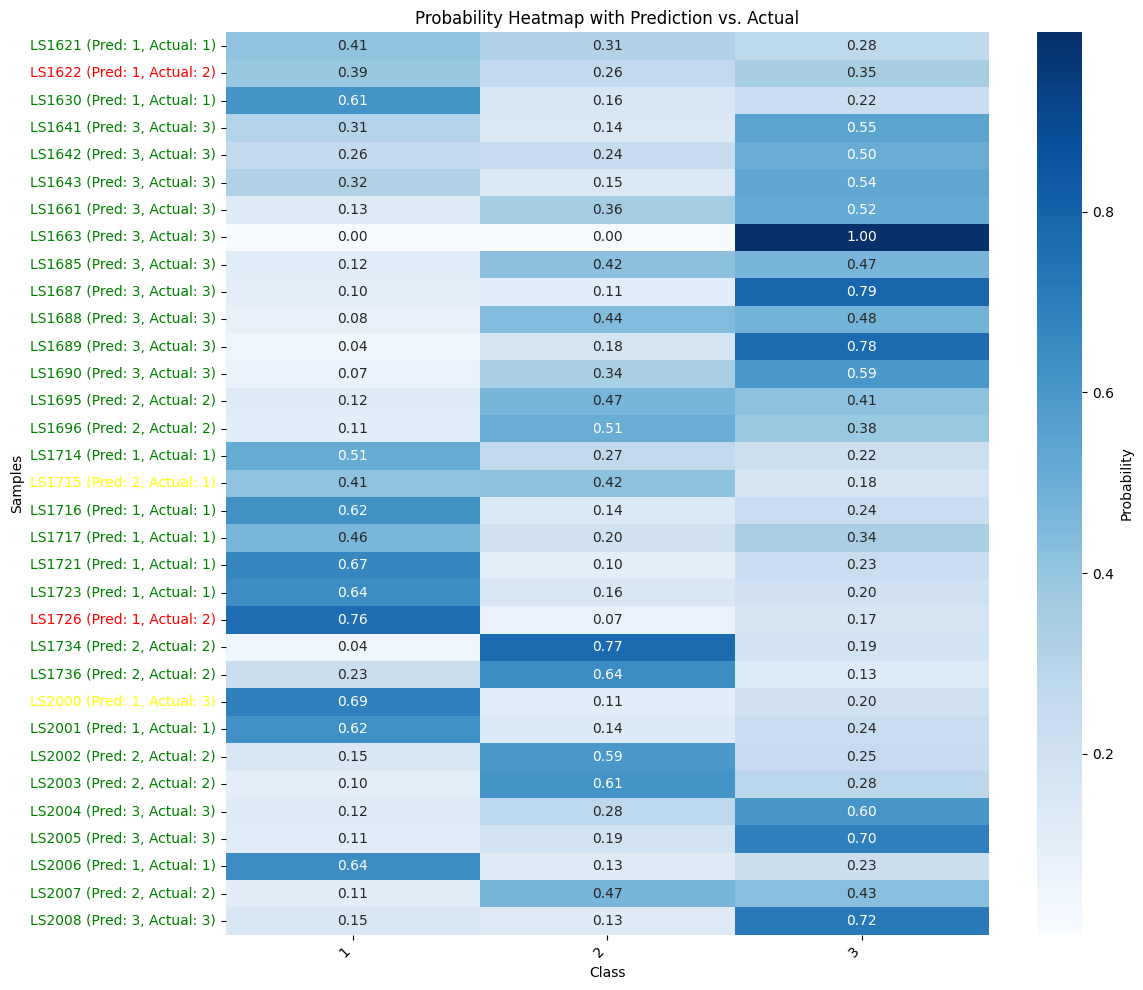





VIF Table

---

| variables         |     VIF |
|:------------------|--------:|
| B1_B5_angle_25-1  | 1.29847 |
| loc_B5_1-5        | 2.06977 |
| cm5_atom_5        | 3.33206 |
| bond_length_12-14 | 2.16365 |

Confusion Matrix

Results saved to classification_results.txt in C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld


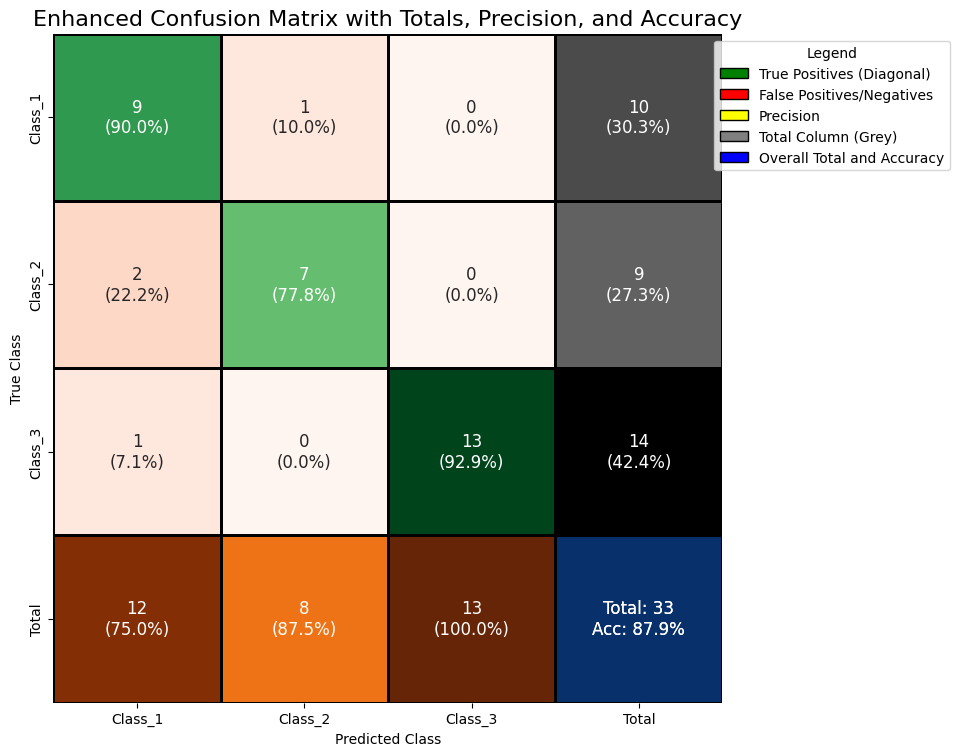

Exiting model selection.


In [ ]:
#('B1_19-18', 'B5_19-18', 'Frequency_Stretch_5_4', 'dipole_z_10-11-12')

results=[fit_and_evaluate_single_combination_classification(Regression_model,combination=['B1_B5_angle_25-1', 'loc_B5_1-5', 'cm5_atom_5', 'bond_length_12-14'])]
print(results)
plot.print_models_classification_table(results)

[{'combination': ['B1_19-18', 'B5_19-18', 'Frequency_Stretch_5_4', 'dipole_z_10-11-12'], 'scores': {'accuracy': 0.9090909090909091, 'precision': 0.9191919191919192, 'recall': 0.9090909090909091, 'f1_score': 0.9080578512396694, 'mc_fadden_r2': 0.352347531475139, 'avg_accuracy': 0.7619047619047619, 'avg_f1_score': 0.7693877551020407}, 'models': <modeling.ClassificationModel object at 0x00000238905CDA30>}]
| formula                                                                |   accuracy |   precision |   recall |       f1 |   mcfaden |   avg_accuracy |   avg_f1 |   Model_id |
|:-----------------------------------------------------------------------|-----------:|------------:|---------:|---------:|----------:|---------------:|---------:|-----------:|
| ['B1_19-18', 'B5_19-18', 'Frequency_Stretch_5_4', 'dipole_z_10-11-12'] |   0.909091 |    0.919192 | 0.909091 | 0.908058 |  0.352348 |       0.761905 | 0.769388 |          0 |
Checking correlation matrix:
                        B1_19-18 

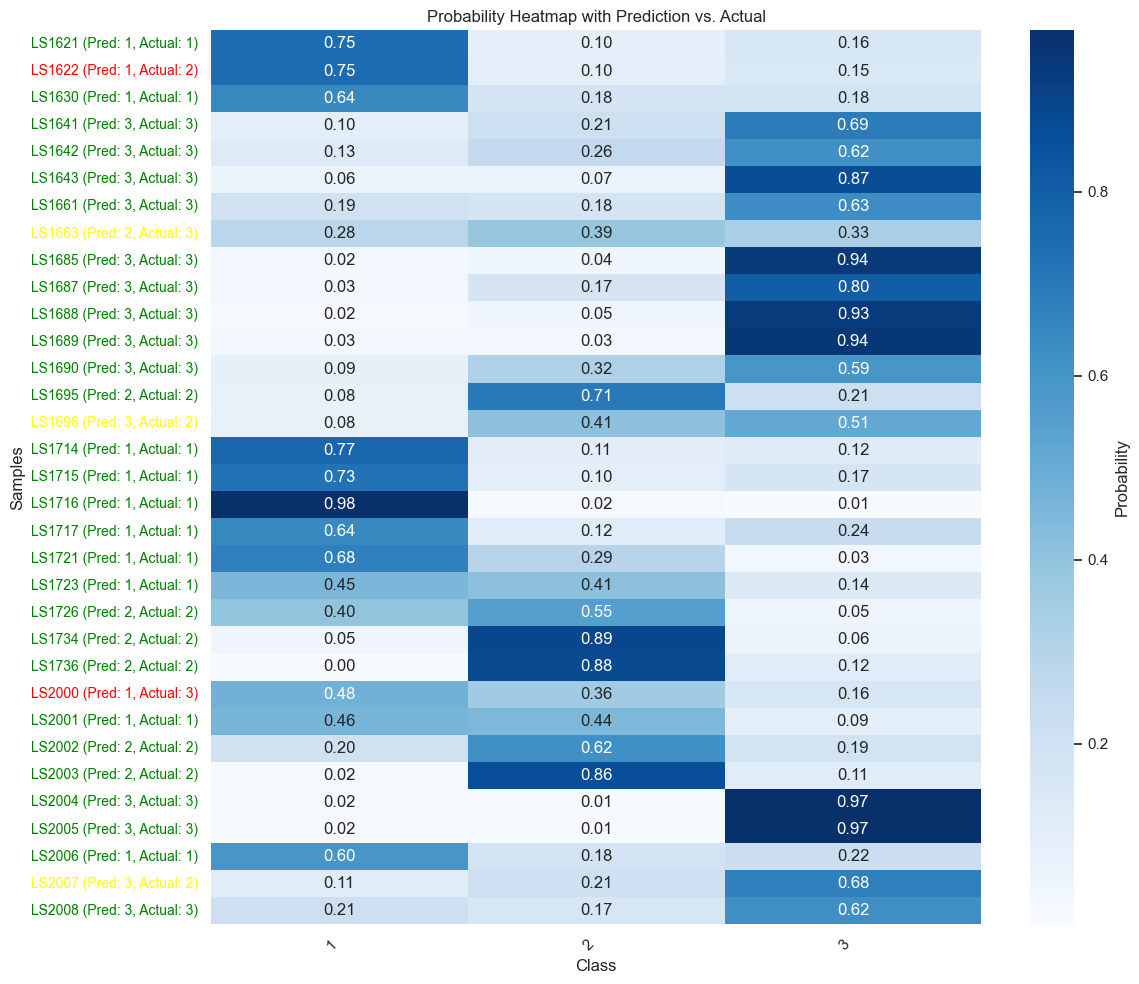





VIF Table

---

| variables             |     VIF |
|:----------------------|--------:|
| B1_19-18              | 1.01135 |
| B5_19-18              | 1.14528 |
| Frequency_Stretch_5_4 | 1.37042 |
| dipole_z_10-11-12     | 1.24114 |

Confusion Matrix

Results saved to classification_results.txt in C:\Users\edens\Documents\GitHub\lucas_project\new_logs_hirshfeld


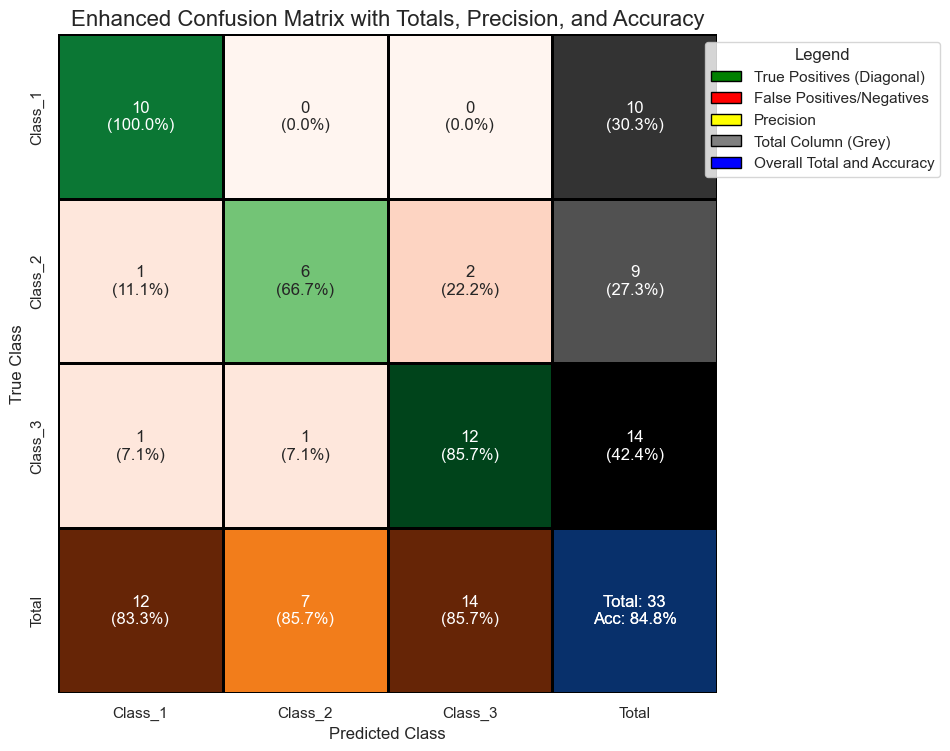

Exiting model selection.


In [17]:
#('B1_19-18', 'B5_19-18', 'Frequency_Stretch_5_4', 'dipole_z_10-11-12')

results=[fit_and_evaluate_single_combination_classification(Regression_model,combination=['B1_19-18', 'B5_19-18', 'Frequency_Stretch_5_4', 'dipole_z_10-11-12'])]
print(results)
plot.print_models_classification_table(results)